In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
fifamach=pd.read_csv('unsupervized.csv')
fifamach.head()

ID               Name Position  Age  Height(cm)  Weight(kgs)  \
0  158023           L. Messi       RF   31  173.727522    72.137028   
1   20801  Cristiano Ronaldo       ST   33  188.966778    83.025636   
2  190871          Neymar Jr       LW   26  179.823225    68.053800   
3  193080             De Gea       GK   27  195.062481    76.220256   
4  192985       K. De Bruyne      RCM   27  155.745200    69.868568   

  Preferred Foot  Weak Foot Nationality Continent  ...  LWB LDM CDM  RDM  RWB  \
0           Left        4.0   Argentina   America  ...   64  61  61   61   64   
1          Right        4.0    Portugal    Europe  ...   65  61  61   61   65   
2          Right        5.0      Brazil   America  ...   65  60  60   60   65   
3          Right        3.0       Spain    Europe  ...   50  50  50   50   50   
4          Right        5.0     Belgium    Europe  ...   77  77  77   77   77   

   LB  LCB  CB  RCB  RB  
0  59   47  47   47  59  
1  61   53  53   53  61  
2  60   47  47   47  60  
3  50   50  50   50  50  
4  73   66  66   66  73  

[5 rows x 90 columns]

In [4]:
fifamach.describe()

ID           Age    Height(cm)   Weight(kgs)     Weak Foot  \
count   18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean   214298.338606     25.122206    176.687304     75.307016      2.947438   
std     29965.244204      4.669943     13.644282      7.065593      0.659591   
min        16.000000     16.000000    155.440415     49.906120      1.000000   
25%    200315.500000     21.000000    155.745200     69.868568      3.000000   
50%    221759.000000     25.000000    179.823225     74.859180      3.000000   
75%    236529.500000     28.000000    185.918927     79.849792      3.000000   
max    246620.000000     45.000000    210.301737    110.247156      5.000000   

          Inter_Rep   year_joined  month_joined    day_joined        Jersey  \
count  18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean       1.112924   2016.676498      5.299665      9.082880     19.508046   
std        0.393554      2.135431      3.071800      9.962116     15.935210   
min        1.000000   1991.000000      1.000000      1.000000      1.000000   
25%        1.000000   2016.000000      1.000000      1.000000      8.000000   
50%        1.000000   2017.000000      7.000000      3.000000     17.000000   
75%        1.000000   2018.000000      7.000000     16.000000     26.000000   
max        5.000000   2019.000000     12.000000     31.000000     99.000000   

       ...           LWB           LDM           CDM           RDM  \
count  ...  18207.000000  18207.000000  18207.000000  18207.000000   
mean   ...     56.652881     56.043555     56.043555     56.043555   
std    ...      8.760726      9.720149      9.720149      9.720149   
min    ...     30.000000     28.000000     28.000000     28.000000   
25%    ...     50.000000     50.000000     50.000000     50.000000   
50%    ...     56.000000     56.000000     56.000000     56.000000   
75%    ...     63.000000     63.000000     63.000000     63.000000   
max    ...     85.000000     87.000000     87.000000     87.000000   

                RWB            LB           LCB            CB           RCB  \
count  18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean      56.652881     56.027297     54.971659     54.971659     54.971659   
std        8.760726      9.213375     11.156382     11.156382     11.156382   
min       30.000000     29.000000     25.000000     25.000000     25.000000   
25%       50.000000     50.000000     47.000000     47.000000     47.000000   
50%       56.000000     56.000000     55.000000     55.000000     55.000000   
75%       63.000000     63.000000     64.000000     64.000000     64.000000   
max       85.000000     84.000000     87.000000     87.000000     87.000000   

                 RB  
count  18207.000000  
mean      56.027297  
std        9.213375  
min       29.000000  
25%       50.000000  
50%       56.000000  
75%       63.000000  
max       84.000000  

[8 rows x 78 columns]

In [5]:
positions = {
    'Forward' : ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'],
    'Midfield' : ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCB', 'RCM', 'RDM', 'RM'],
    'Defense' : ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'],
    'Goalkeeper' : ['GK']
}

In [6]:
positions_gen = []
for e in fifamach['Position']:
    if e in positions['Forward']:
        positions_gen.append('Forward')
    elif e in positions['Midfield']:
        positions_gen.append('Midfield')
    elif e in positions['Defense']:
        positions_gen.append('Defense')
    else:
        positions_gen.append('Goalkeeper')

In [7]:
fifamach['Generic'] = positions_gen

In [8]:
cols=[c for c in fifamach.columns.values if c not in ['Name', 'Position', 'Preferred Foot','Nationality', 'Continent',
                                                      'Club', 'Joined', 'Contract_Expiry','Work Rate', 'Work RAttack', 
                                                      'Work RDefense','Evolution', 'ID', 'Generic']]

In [9]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit(fifamach[cols])
fifamach['labels']=clusters.labels_

In [10]:
len(clusters.cluster_centers_)

4

In [11]:
clusters.cluster_centers_

array([[2.49930283e+01, 1.76634658e+02, 7.51749146e+01, 2.91279178e+00,
        1.04400871e+00, 2.01676365e+03, 5.18680361e+00, 8.87992530e+00,
        2.00245254e+01, 6.47400560e+01, 7.01040149e+01, 5.36395892e+00,
        1.04312730e+06, 8.28565204e+03, 1.53373607e+06, 1.56163654e+03,
        2.27942733e+00, 5.69996864e+01, 5.10747073e+01, 5.37508299e+01,
        4.52782620e+01, 4.73291212e+01, 6.25849470e+01, 6.37904436e+01,
        6.38891313e+01, 6.20495212e+01, 6.47178322e+01, 6.01492161e+01,
        5.36092006e+01, 5.66070174e+01, 5.45811834e+01, 4.54698112e+01,
        4.82774981e+01, 5.16968094e+01, 6.34795142e+01, 5.68685414e+01,
        4.81446150e+01, 4.39110765e+01, 6.45470459e+01, 5.11283729e+01,
        4.61959239e+01, 4.66219419e+01, 4.47475723e+01, 1.67916327e+01,
        4.12424297e+01, 4.53683286e+01, 4.13356633e+01, 1.65671831e+01,
        1.64235381e+01, 1.65493724e+01, 1.68976111e+01, 5.55959539e+01,
        5.55959539e+01, 5.55959539e+01, 5.66305633e+01, 5.629953

In [12]:
preds=clusters.fit_predict(fifamach[cols])
len(preds)

18207

In [13]:
distancias=clusters.fit_transform(fifamach[cols])
len(distancias)

18207

In [14]:
import numpy as np

distancias[np.where(preds==1)[0]]

array([[9.85172557e+07, 8.12338582e+07, 4.17800879e+07, 4.47018355e+07],
       [7.14572338e+07, 5.42237000e+07, 1.53587580e+07, 7.20863579e+07],
       [5.02772407e+07, 3.30503824e+07, 7.47725646e+06, 9.30862971e+07],
       ...,
       [4.12810915e+07, 2.40529636e+07, 1.57860708e+07, 1.01985870e+08],
       [3.89101866e+07, 2.16429818e+07, 1.79408347e+07, 1.04281698e+08],
       [4.81582379e+07, 3.10797871e+07, 1.07870502e+07, 9.55373543e+07]])

In [15]:
fifamach[fifamach.labels==2].head()

ID          Name Position  Age  Height(cm)  Weight(kgs)  \
28  198710  J. Rodríguez      LAM   26  155.745200    78.035024   
38  167664    G. Higuaín       LS   30  185.918927    88.923632   
75  135507   Fernandinho      CDM   33  155.440415    67.146416   
76      41       Iniesta       LF   34  173.727522    68.053800   
91  187961      Paulinho      LDM   29  182.871076    71.229644   

   Preferred Foot  Weak Foot Nationality Continent  ...  CDM RDM RWB  LB  LCB  \
28           Left        3.0    Colombia   America  ...   68  68  69  65   58   
38          Right        4.0   Argentina   America  ...   53  53  55  51   48   
75          Right        4.0      Brazil   America  ...   83  83  79  79   81   
76          Right        4.0       Spain    Europe  ...   73  73  71  68   63   
91          Right        3.0      Brazil   America  ...   81  81  78  78   80   

    CB  RCB  RB   Generic  labels  
28  58   58  65  Midfield       2  
38  48   48  51   Forward       2  
75  81   81  79  Midfield       2  
76  63   63  68   Forward       2  
91  80   80  78  Midfield       2  

[5 rows x 92 columns]

In [16]:
fifamach[fifamach.labels==1].shape

(299, 92)

In [17]:
fifamach[fifamach.labels==3].head()

ID               Name Position  Age  Height(cm)  Weight(kgs)  \
0  158023           L. Messi       RF   31  173.727522    72.137028   
1   20801  Cristiano Ronaldo       ST   33  188.966778    83.025636   
2  190871          Neymar Jr       LW   26  179.823225    68.053800   
3  193080             De Gea       GK   27  195.062481    76.220256   
4  192985       K. De Bruyne      RCM   27  155.745200    69.868568   

  Preferred Foot  Weak Foot Nationality Continent  ...  CDM RDM RWB  LB  LCB  \
0           Left        4.0   Argentina   America  ...   61  61  64  59   47   
1          Right        4.0    Portugal    Europe  ...   61  61  65  61   53   
2          Right        5.0      Brazil   America  ...   60  60  65  60   47   
3          Right        3.0       Spain    Europe  ...   50  50  50  50   50   
4          Right        5.0     Belgium    Europe  ...   77  77  77  73   66   

   CB  RCB  RB     Generic  labels  
0  47   47  59     Forward       3  
1  53   53  61     Forward       3  
2  47   47  60     Forward       3  
3  50   50  50  Goalkeeper       3  
4  66   66  73    Midfield       3  

[5 rows x 92 columns]

In [18]:
fifamach[fifamach.labels==0].head()

ID         Name Position  Age  Height(cm)  Weight(kgs)  \
41     1179    G. Buffon       GK   40  195.062481    92.099476   
152  137186  A. Barzagli       CB   37  188.966778    87.108864   
314  146530   Dani Alves       RB   35  176.775373    68.053800   
317   48940      P. Čech       GK   36  198.110332    89.831016   
318    5479     Casillas       GK   37  185.918927    83.933020   

    Preferred Foot  Weak Foot     Nationality Continent  ...  CDM RDM RWB  LB  \
41           Right        2.0           Italy    Europe  ...   50  50  50  50   
152          Right        3.0           Italy    Europe  ...   75  75  71  74   
314          Right        3.0          Brazil   America  ...   78  78  79  79   
317           Left        3.0  Czech Republic    Europe  ...   50  50  50  50   
318           Left        2.0           Spain    Europe  ...   50  50  50  50   

     LCB  CB  RCB  RB     Generic  labels  
41    50  50   50  50  Goalkeeper       0  
152   82  82   82  74     Defense       0  
314   75  75   75  79     Defense       0  
317   50  50   50  50  Goalkeeper       0  
318   50  50   50  50  Goalkeeper       0  

[5 rows x 92 columns]

In [19]:
fifamach.groupby(['labels'])['Value(€M)'].mean()

labels
0    1.043127e+06
1    2.667893e+07
2    8.874289e+06
3    6.591000e+07
Name: Value(€M), dtype: float64

In [20]:
fifamach.groupby(['labels'])['Wage(€K)'].mean()

labels
0      8285.652039
1     86274.247492
2     30445.621863
3    237680.000000
Name: Wage(€K), dtype: float64

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.scatter(fifamach['Value(€M)'],fifamach['Wage(€K)'], c=fifamach['labels'])
plt.show()

In [22]:
# UMAP (Uniform Manifold Aprox and Projection)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [23]:
fifamach.shape

(18207, 92)

In [24]:
fifamach_num = fifamach._get_numeric_data()

In [25]:
redu=umap.UMAP().fit_transform(fifamach_num)
redu.shape

(18207, 2)

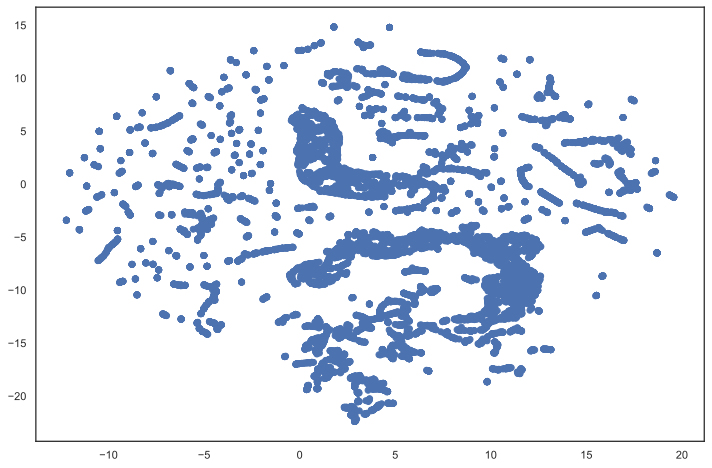

In [26]:
plt.scatter(redu[:,0], redu[:,1])

In [28]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(fifamach_num);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data)
    plt.title(title, fontsize=18)